In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet,ElasticNetCV
from pandas_profiling import profile_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\linear-regression-weather-dataset-master/weather.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
df.shape

(366, 22)

In [4]:
pf=df.profile_report()
pf

In [5]:
pf.to_file("before_preprocessing.html")

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [7]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [8]:
df['Sunshine']=df.Sunshine.fillna(df.Sunshine.mean())
df['WindGustDir']=df.WindGustDir.fillna(df.WindGustDir.value_counts().index[0])
df['WindGustSpeed']=df.WindGustSpeed.fillna(df.WindGustSpeed.mean())
df['WindDir9am']=df.WindDir9am.fillna(df.WindDir9am.value_counts().index[0])
df['WindDir3pm']=df.WindDir3pm.fillna(df.WindDir3pm.value_counts().index[0])
df['WindSpeed9am']=df.WindSpeed9am.fillna(df.WindSpeed9am.mean())

In [9]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

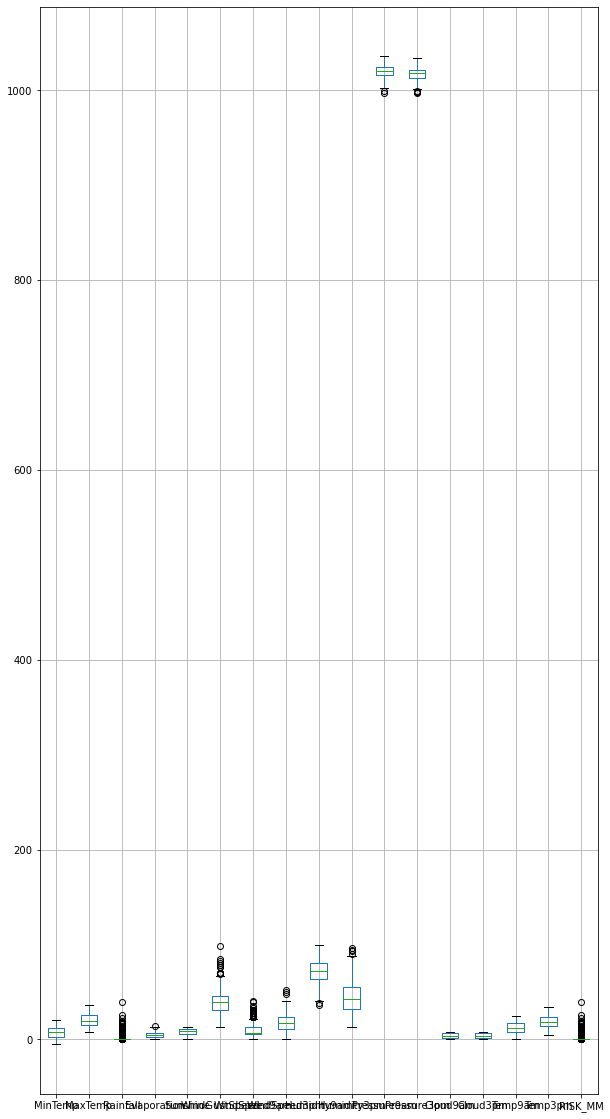

In [10]:
plt.figure(figsize=(10,20))
df.boxplot()

In [11]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence    

In [12]:
l=[]
for index, i in enumerate(df.dtypes!=object):
  if i==True:
    l.append(index)
print(l)
columns=df.columns
df2=[]
for i in l:
  df2.append(columns[i])

[0, 1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]


In [13]:
for i in df2:
  outliers_imputation_mild(df,i)

IQR: 10.2
Lower Fence MinTemp: -13.0
Upper Fence MinTemp: 27.799999999999997
____________________________________________
IQR: 10.475
Lower Fence MaxTemp: -0.6874999999999982
Upper Fence MaxTemp: 41.2125
____________________________________________
IQR: 0.2
Lower Fence Rainfall: -0.30000000000000004
Upper Fence Rainfall: 0.5
____________________________________________
IQR: 4.2
Lower Fence Evaporation: -4.1000000000000005
Upper Fence Evaporation: 12.700000000000001
____________________________________________
IQR: 4.5
Lower Fence Sunshine: -0.75
Upper Fence Sunshine: 17.25
____________________________________________
IQR: 15.0
Lower Fence WindGustSpeed: 8.5
Upper Fence WindGustSpeed: 68.5
____________________________________________
IQR: 7.0
Lower Fence WindSpeed9am: -4.5
Upper Fence WindSpeed9am: 23.5
____________________________________________
IQR: 13.0
Lower Fence WindSpeed3pm: -8.5
Upper Fence WindSpeed3pm: 43.5
____________________________________________
IQR: 17.0
Lower Fence Hu

<AxesSubplot:>

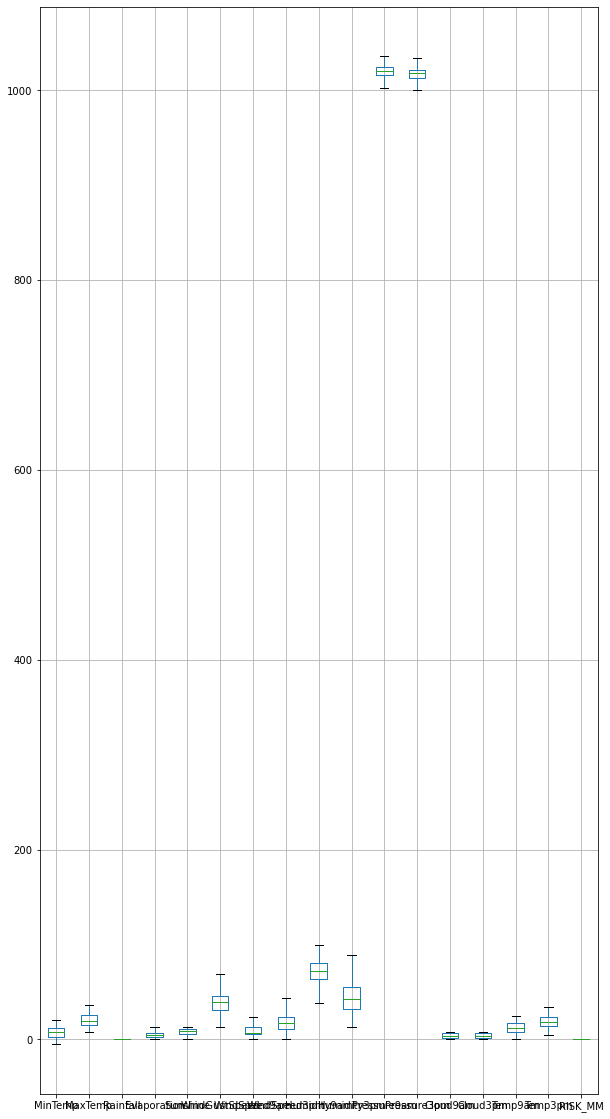

In [14]:
plt.figure(figsize=(10,20))
df.boxplot()

In [15]:
df.dtypes!=object

MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday        False
RISK_MM           True
RainTomorrow     False
dtype: bool

In [16]:
dt={'No':0,'Yes':1}

In [17]:
df['RainToday']=df["RainToday"].map(dt)
df['RainTomorrow']=df["RainTomorrow"].map(dt)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,0,0.5,1
1,14.0,26.9,0.5,4.4,9.7,ENE,39.0,E,W,4.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,1,0.5,1
2,13.7,23.4,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,1,0.5,1
3,13.3,15.5,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,...,56.0,1005.5,1007.0,2,7,13.5,14.1,1,0.5,1
4,7.6,16.1,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,68.5,SSE,NW,7.0,...,15.0,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22.0,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47.0,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39.0,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


In [18]:
df2=df[["WindGustDir","WindDir3pm", "WindDir9am"]].copy()

In [19]:
df3=pd.get_dummies(df2)
df3

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
362,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
363,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df4=df.drop(columns=["WindGustDir","WindDir3pm", "WindDir9am"])
df4

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7,7,14.4,23.6,0,0.5,1
1,14.0,26.9,0.5,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5,3,17.5,25.7,1,0.5,1
2,13.7,23.4,0.5,5.8,3.3,68.5,6.0,6.0,82.0,69.0,1009.5,1007.2,8,7,15.4,20.2,1,0.5,1
3,13.3,15.5,0.5,7.2,9.1,54.0,23.5,24.0,62.0,56.0,1005.5,1007.0,2,7,13.5,14.1,1,0.5,1
4,7.6,16.1,0.5,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,68.5,7.0,43.5,38.5,15.0,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19.0,45.0,22.0,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9.0,63.0,47.0,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28.0,69.0,39.0,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


In [21]:
df5=pd.concat([df4,df3], join="outer", axis=1)
df5

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,...,0,0,0,0,0,0,1,0,0,0
1,14.0,26.9,0.5,4.4,9.7,39.0,4.0,17.0,80.0,36.0,...,0,0,0,0,0,0,0,0,0,0
2,13.7,23.4,0.5,5.8,3.3,68.5,6.0,6.0,82.0,69.0,...,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,0.5,7.2,9.1,54.0,23.5,24.0,62.0,56.0,...,0,0,0,0,0,0,0,0,1,0
4,7.6,16.1,0.5,5.6,10.6,50.0,20.0,28.0,68.0,49.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,68.5,7.0,43.5,38.5,15.0,...,0,0,0,0,1,0,0,0,0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19.0,45.0,22.0,...,1,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9.0,63.0,47.0,...,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28.0,69.0,39.0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
pf1=df.profile_report()
pf1
pf1.to_file("after_preprocessing.html")

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# To check multi colinearity
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [24]:
vif_score(df4)

,Features,VIF_score
0,MinTemp,14.690808
1,MaxTemp,74.149274
2,Rainfall,4.047156
3,Evaporation,2.992028
4,Sunshine,4.515786
5,WindGustSpeed,3.126943
6,WindSpeed9am,2.267363
7,WindSpeed3pm,2.628023
8,Humidity9am,4.047762
9,Humidity3pm,6.111945


In [25]:
X=df5.drop(columns=["MaxTemp"])
X

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,8.0,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,...,0,0,0,0,0,0,1,0,0,0
1,14.0,0.5,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,...,0,0,0,0,0,0,0,0,0,0
2,13.7,0.5,5.8,3.3,68.5,6.0,6.0,82.0,69.0,1009.5,...,0,0,0,0,0,0,0,0,0,0
3,13.3,0.5,7.2,9.1,54.0,23.5,24.0,62.0,56.0,1005.5,...,0,0,0,0,0,0,0,0,1,0
4,7.6,0.5,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,68.5,7.0,43.5,38.5,15.0,1016.1,...,0,0,0,0,1,0,0,0,0,0
362,7.1,0.0,11.6,12.7,48.0,2.0,19.0,45.0,22.0,1020.0,...,1,0,0,0,0,0,0,0,0,0
363,12.5,0.0,8.4,5.3,43.0,11.0,9.0,63.0,47.0,1024.0,...,0,0,0,0,0,0,0,0,0,0
364,12.5,0.0,5.0,7.1,46.0,6.0,28.0,69.0,39.0,1021.0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
y=df5["MaxTemp"]
y

0      24.3
1      26.9
2      23.4
3      15.5
4      16.1
       ... 
361    30.7
362    28.4
363    19.9
364    26.9
365    30.2
Name: MaxTemp, Length: 366, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

In [28]:
X_train

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
224,7.3,0.2,1.2,8.5,43.0,15.0,24.0,86.0,48.0,1023.7,...,0,0,0,0,0,0,0,0,0,0
197,4.5,0.5,3.0,4.3,35.0,9.0,15.0,88.0,69.0,1017.7,...,0,0,0,0,0,0,0,1,0,0
258,-0.9,0.2,2.0,1.9,17.0,6.0,9.0,99.0,62.0,1024.1,...,0,0,0,1,0,0,0,0,0,0
152,3.5,0.0,6.0,10.3,22.0,7.0,11.0,72.0,34.0,1023.9,...,0,0,0,0,0,0,0,0,0,0
150,4.2,0.0,6.4,10.8,50.0,6.0,31.0,60.0,34.0,1011.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.5,0.0,6.2,11.5,31.0,2.0,9.0,69.0,22.0,1026.2,...,0,0,1,0,0,0,0,0,0,0
359,3.3,0.0,5.2,10.8,43.0,4.0,19.0,57.0,16.0,1018.8,...,0,0,0,0,0,0,0,0,0,0
323,5.1,0.0,3.6,10.3,44.0,9.0,28.0,54.0,30.0,1016.4,...,0,0,0,0,0,0,0,0,0,0
280,-0.6,0.0,3.0,5.0,41.0,7.0,26.0,89.0,78.0,1018.4,...,0,0,0,1,0,0,0,0,0,0


In [29]:
y_train

224    16.4
197    16.0
258    12.8
152    21.8
150    18.9
       ... 
343    20.0
359    25.5
323    23.3
280    11.1
8      19.5
Name: MaxTemp, Length: 274, dtype: float64

In [30]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [31]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))

In [32]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-0.038168,-0.2,-0.840,0.250000,0.046729,0.276596,0.103448,0.570248,-0.094842,0.294895,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.251908,1.0,-0.552,-0.367647,-0.252336,-0.234043,-0.310345,0.636364,0.464226,-0.057657,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,-0.664122,-0.2,-0.712,-0.720588,-0.925234,-0.489362,-0.586207,1.000000,0.277870,0.318399,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.328244,-1.0,-0.072,0.514706,-0.738318,-0.404255,-0.494253,0.107438,-0.467554,0.306647,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.274809,-1.0,-0.008,0.588235,0.308411,-0.489362,0.425287,-0.289256,-0.467554,-0.439589,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.557252,-1.0,-0.040,0.691176,-0.401869,-0.829787,-0.586207,0.008264,-0.787022,0.441792,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
270,-0.343511,-1.0,-0.200,0.588235,0.046729,-0.659574,-0.126437,-0.388430,-0.946755,0.006978,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
271,-0.206107,-1.0,-0.456,0.514706,0.084112,-0.234043,0.287356,-0.487603,-0.574043,-0.134043,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
272,-0.641221,-1.0,-0.552,-0.264706,-0.028037,-0.404255,0.195402,0.669421,0.703827,-0.016526,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [33]:
linear_regression=LinearRegression()

In [34]:
linear_regression.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
linear_regression.coef_

array([-1.42923162e-01, -1.09559188e-01,  5.01626555e-01,  9.73017553e-01,
        4.47261560e-01, -4.32577730e-02, -2.10611332e-01,  2.40557479e-01,
        7.90207221e-01,  4.44172806e-01, -2.69319445e-01,  8.92499608e-02,
        3.10286909e-01,  1.73845456e+00,  1.29987434e+01, -4.74036019e-02,
        1.25182542e-02,  1.06526365e-01,  1.16675074e+12,  1.16675074e+12,
        1.16675074e+12,  1.16675074e+12,  1.16675074e+12,  1.16675074e+12,
        1.16675074e+12,  1.16675074e+12,  1.16675074e+12,  1.16675074e+12,
        1.16675074e+12,  1.16675074e+12,  1.16675074e+12,  1.16675074e+12,
        1.16675074e+12,  1.16675074e+12, -3.00751166e+11, -3.00751166e+11,
       -3.00751166e+11, -3.00751166e+11, -3.00751166e+11, -3.00751166e+11,
       -3.00751166e+11, -3.00751166e+11, -3.00751166e+11, -3.00751166e+11,
       -3.00751166e+11, -3.00751166e+11, -3.00751166e+11, -3.00751166e+11,
       -3.00751166e+11, -3.00751166e+11,  1.72699236e+12,  1.72699236e+12,
        1.72699236e+12,  

In [36]:
linear_regression.intercept_

36301887009591.38

In [37]:
X_test_scaled=pd.DataFrame((scaler.fit_transform(X_test)))

In [38]:
pred=linear_regression.predict(X_test_scaled)

In [39]:
pred

array([16.3828125, 23.875    ,  8.84375  , 28.875    , 23.65625  ,
       10.15625  , 27.1796875,  8.6640625, 19.140625 , 26.7578125,
       29.578125 , 22.46875  , 28.71875  , 15.1328125, 14.9609375,
       21.96875  , 15.2265625, 21.6328125, 15.9296875, 19.6171875,
       13.7421875, 11.953125 , 14.328125 , 17.546875 , 23.25     ,
        9.1015625, 10.421875 , 17.1484375, 32.328125 , 20.21875  ,
       33.015625 , 13.2734375, 23.8359375, 22.375    , 27.4609375,
       13.7421875, 22.734375 , 14.875    , 13.234375 , 26.15625  ,
       16.5078125, 12.625    , 12.390625 , 21.1796875, 15.8671875,
       20.8203125, 27.796875 , 15.5546875, 12.984375 , 14.8671875,
       23.5390625, 25.7734375, 18.0859375, 18.2578125,  9.78125  ,
       23.       , 27.8359375,  9.2421875, 28.3984375, 32.0390625,
       20.6015625, 17.1953125, 14.71875  , 16.0078125, 19.921875 ,
       32.03125  , 25.7890625, 11.75     , 17.8125   , 15.3515625,
       17.3046875, 14.3984375, 15.3984375, 34.3203125, 18.0625

In [41]:
linear_regression.score(X_test_scaled,y_test)

0.9560059192302054

In [42]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean abolute error is: 1.0150135869565218
Mean squared error is: 1.9317943805197009
Root mean squared error is: 1.3898900605874196


In [43]:
def adjusted_r2(x,y):
    r2=linear_regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [44]:
adjusted_r2(X_test_scaled,y_test)

0.8398615459979476

In [45]:
elastic=ElasticNetCV(alphas=None,cv=20)
elastic.fit(X_train_scaled,y_train)

ElasticNetCV(cv=20)

In [46]:
elastic.alpha_

0.00596978814755696

In [47]:
elastic.l1_ratio

0.5

In [48]:
elastic_lingreg=ElasticNet(alpha=elastic.alpha_, l1_ratio=elastic.l1_ratio)

In [49]:
elastic_lingreg.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.00596978814755696)

In [50]:
elastic_lingreg.score(X_train_scaled,y_train)

0.9874025444804428

In [59]:
df_new= pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(df_new)

     Actual  Predicted
188    17.6  16.382812
103    24.2  23.875000
285    10.4   8.843750
353    28.5  28.875000
98     24.2  23.656250
..      ...        ...
59     35.0  35.351562
23     24.3  23.148438
88     33.2  33.179688
309    12.4  10.210938
15     32.1  32.453125

[92 rows x 2 columns]


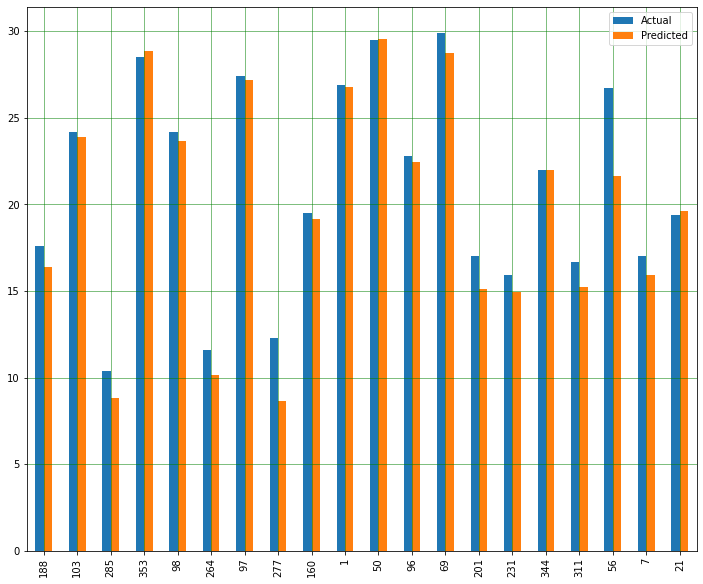

In [66]:
df_new1=df_new.head(20)
df_new1.plot(kind='bar', figsize=(12,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()